## LINMA1702 - Laboratoire optimisation linéaire - Question 1 : Stigler's diet

In [42]:
**Instructions**. Dans ce notebook, on vous fournit les énoncés des questions à traiter, les données du problème ainsi qu'une partie du code nécessaire pour répondre à ces questions. Les parties qui sont à compléter sont indiquées par (...) (et les commentaires #TODO)

SyntaxError: unterminated string literal (detected at line 1) (2278913044.py, line 1)

In [3]:
from scipy.optimize import linprog   # import du solveur d'optimisation linéaire à utiliser
import numpy as np                   # numpy toujours utile pour manipuler des vecteurs & matrices
import matplotlib.pyplot as plt      # pour graphiques éventuels

### Introduction et données

Stigler pose en 1945 le probleme de déterminer le régime alimentaire idéal à moindre coût.

Il considère pour cela 9 nutriments et détermine les quantités idéales journalières pour un homme modérement actif, pesant 154 livres (pour chacune nutriment, l'unité de mesure pour la quantité est précisée) :

In [4]:
StiglerNutriments =                [ 'Calories (kcal)', 'Protein (g)', 'Calcium (g)', 'Iron (mg)', 'Vitamin A (kIU)',  
                                     'Thiamine (mg)', 'Riboflavin (mg)', 'Niacin (mg)', 'Ascorbic Acid (mg)' ]
StiglerQuantitesIdeales = np.array([ 3000 , 70 , 0.8 , 12 , 5 , 1.8 , 2.7 , 18 , 75 ])

Il dresse ensuite une liste de 77 aliments :

In [5]:
StiglerAliments = ['Wheat Flour (Enriched)','Macaroni','Wheat Cereal (Enriched)','Corn Flakes','Corn Meal',
                   'Hominy Grits','Rice','Rolled Oats','White Bread (Enriched)','Whole Wheat Bread','Rye Bread',
                   'Pound Cake','Soda Crackers','Milk','Evaporated Milk (can)','Butter','Oleomargarine','Eggs',
                   'Cheese (Cheddar)','Cream','Peanut Butter','Mayonnaise','Crisco','Lard','Sirloin Steak',
                   'Round Steak','Rib Roast','Chuck Roast','Plate','Liver (Beef)','Leg of Lamb','Lamb Chops (Rib)',
                   'Pork Chops','Pork Loin Roast','Bacon','Ham, smoked','Salt Pork','Roasting Chicken','Veal Cutlets',
                   'Salmon, Pink (can)','Apples','Bananas','Lemons','Oranges','Green Beans','Cabbage','Carrots',
                   'Celery','Lettuce','Onions','Potatoes','Spinach','Sweet Potatoes','Peaches (can)','Pears (can)',
                   'Pineapple (can)','Asparagus (can)','Green Beans (can)','Pork and Beans (can)','Corn (can)',
                   'Peas (can)','Tomatoes (can)','Tomato Soup (can)','Peaches, Dried','Prunes, Dried',
                   'Raisins, Dried','Peas, Dried','Lima Beans, Dried','Navy Beans, Dried','Coffee','Tea',
                   'Cocoa','Chocolate','Sugar','Corn Syrup','Molasses','Strawberry Preserves']

 et, pour chacun d'eux, la quantité de chaque nutriment qu'ils renferment par dollar de cet aliment (avec les prix de 1939) :

In [6]:
# Matrice contenant les informations nutritionnelles (chacune des 9 lignes = un nutriment ; chacune des 77 colonnes = un aliment)
StiglerTable = np.array([ [44700,11600,11800,11400,36000,28600,21200,25300,15000,12200,12400,8000 ,12500,6100 ,8400 ,10800,20600,2900 ,7400 ,3500 ,15700,8600 ,20100,41700,2900 ,2200 ,3400 ,3600 ,8500 ,2200 ,3100 ,3300 ,3500 ,4400 ,10400,6700 ,18800,1800 ,1700 ,5800 ,5800 ,4900 ,1000 ,2200 ,2400 ,2600 ,2700 ,900  ,400  ,5800 ,14300,1100 ,9600 ,3700 ,3000 ,2400 ,400  ,1000 ,7500 ,5200 ,2300 ,1300 ,1600 ,8500 ,12800,13500,20000,17400,26900,0    ,0    ,8700 ,8000 ,34900,14700,9000 ,6400 ],
                          [1411 ,418  ,377  ,252  ,897  ,680  ,460  ,907  ,488  ,484  ,439  ,130  ,288  ,310  ,422  ,9    ,17   ,238  ,448  ,49   ,661  ,18   ,0    ,0    ,166  ,214  ,213  ,309  ,404  ,333  ,245  ,140  ,196  ,249  ,152  ,212  ,164  ,184  ,156  ,705  ,27   ,60   ,21   ,40   ,138  ,125  ,73   ,51   ,27   ,166  ,336  ,106  ,138  ,20   ,8    ,16   ,33   ,54   ,364  ,136  ,136  ,63   ,71   ,87   ,99   ,104  ,1367 ,1055 ,1691 ,0    ,0    ,237  ,77   ,0    ,0    ,0    ,11   ],
                          [2    ,0.7  ,14.4 ,0.1  ,1.7  ,0.8  ,0.6  ,5.1  ,2.5  ,2.7  ,1.1  ,0.4  ,0.5  ,10.5 ,15.1 ,0.2  ,0.6  ,1    ,16.4 ,1.7  ,1    ,0.2  ,0    ,0    ,0.1  ,0.1  ,0.1  ,0.2  ,0.2  ,0.2  ,0.1  ,0.1  ,0.2  ,0.3  ,0.2  ,0.2  ,0.1  ,0.1  ,0.1  ,6.8  ,0.5  ,0.4  ,0.5  ,1.1  ,3.7  ,4    ,2.8  ,3    ,1.1  ,3.8  ,1.8  ,0    ,2.7  ,0.4  ,0.3  ,0.4  ,0.3  ,2    ,4    ,0.2  ,0.6  ,0.7  ,0.6  ,1.7  ,2.5  ,2.5  ,4.2  ,3.7  ,11.4 ,0    ,0    ,3    ,1.3  ,0    ,0.5  ,10.3 ,0.4  ],
                          [365  ,54   ,175  ,56   ,99   ,80   ,41   ,341  ,115  ,125  ,82   ,31   ,50   ,18   ,9    ,3    ,6    ,52   ,19   ,3    ,48   ,8    ,0    ,0    ,34   ,32   ,33   ,46   ,62   ,139  ,20   ,15   ,30   ,37   ,23   ,31   ,26   ,30   ,24   ,45   ,36   ,30   ,14   ,18   ,80   ,36   ,43   ,23   ,22   ,59   ,118  ,138  ,54   ,10   ,8    ,8    ,12   ,65   ,134  ,16   ,45   ,38   ,43   ,173  ,154  ,136  ,345  ,459  ,792  ,0    ,0    ,72   ,39   ,0    ,74   ,244  ,7    ],
                          [0    ,0    ,0    ,0    ,30.9 ,0    ,0    ,0    ,0    ,0    ,0    ,18.9 ,0    ,16.8 ,26   ,44.2 ,55.8 ,18.6 ,28.1 ,16.9 ,0    ,2.7  ,0    ,0.2  ,0.2  ,0.4  ,0    ,0.4  ,0    ,169.2,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0.1  ,0    ,3.5  ,7.3  ,17.4 ,0    ,11.1 ,69   ,7.2  ,188.5,0.9  ,112.4,16.6 ,6.7  ,918.4,290.7,21.5 ,0.8  ,2    ,16.3 ,53.9 ,3.5  ,12   ,34.9 ,53.2 ,57.9 ,86.8 ,85.7 ,4.5  ,2.9  ,5.1  ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0.2  ],
                          [55.4 ,3.2  ,14.4 ,13.5 ,17.4 ,10.6 ,2    ,37.1 ,13.8 ,13.9 ,9.9  ,2.8  ,0    ,4    ,3    ,0    ,0.2  ,2.8  ,0.8  ,0.6  ,9.6  ,0.4  ,0    ,0    ,2.1  ,2.5  ,0    ,1    ,0.9  ,6.4  ,2.8  ,1.7  ,17.4 ,18.2 ,1.8  ,9.9  ,1.4  ,0.9  ,1.4  ,1    ,3.6  ,2.5  ,0.5  ,3.6  ,4.3  ,9    ,6.1  ,1.4  ,1.8  ,4.7  ,29.4 ,5.7  ,8.4  ,0.5  ,0.8  ,2.8  ,1.4  ,1.6  ,8.3  ,1.6  ,4.9  ,3.4  ,3.5  ,1.2  ,3.9  ,6.3  ,28.7 ,26.9 ,38.4 ,4    ,0    ,2    ,0.9  ,0    ,0    ,1.9  ,0.2  ],
                          [33.3 ,1.9  ,8.8  ,2.3  ,7.9  ,1.6  ,4.8  ,8.9  ,8.5  ,6.4  ,3    ,3    ,0    ,16   ,23.5 ,0.2  ,0    ,6.5  ,10.3 ,2.5  ,8.1  ,0.5  ,0    ,0.5  ,2.9  ,2.4  ,2    ,4    ,0    ,50.8 ,3.9  ,2.7  ,2.7  ,3.6  ,1.8  ,3.3  ,1.8  ,1.8  ,2.4  ,4.9  ,2.7  ,3.5  ,0    ,1.3  ,5.8  ,4.5  ,4.3  ,1.4  ,3.4  ,5.9  ,7.1  ,13.8 ,5.4  ,1    ,0.8  ,0.8  ,2.1  ,4.3  ,7.7  ,2.7  ,2.5  ,2.5  ,2.4  ,4.3  ,4.3  ,1.4  ,18.4 ,38.2 ,24.6 ,5.1  ,2.3  ,11.9 ,3.4  ,0    ,0    ,7.5  ,0.4  ],
                          [441  ,68   ,114  ,68   ,106  ,110  ,60   ,64   ,126  ,160  ,66   ,17   ,0    ,7    ,11   ,2    ,0    ,1    ,4    ,0    ,471  ,0    ,0    ,5    ,69   ,87   ,0    ,120  ,0    ,316  ,86   ,54   ,60   ,79   ,71   ,50   ,0    ,68   ,57   ,209  ,5    ,28   ,4    ,10   ,37   ,26   ,89   ,9    ,11   ,21   ,198  ,33   ,83   ,31   ,5    ,7    ,17   ,32   ,56   ,42   ,37   ,36   ,67   ,55   ,65   ,24   ,162  ,93   ,217  ,50   ,42   ,40   ,14   ,0    ,5    ,146  ,3    ],
                          [0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,177  ,60   ,0    ,0    ,0    ,0    ,17   ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,525  ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,46   ,0    ,0    ,544  ,498  ,952  ,1998 ,862  ,5369 ,608  ,313  ,449  ,1184 ,2522 ,2755 ,1912 ,196  ,81   ,399  ,272  ,431  ,0    ,218  ,370  ,1253 ,862  ,57   ,257  ,136  ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ,0    ]])

Enfin il cherche la composition (=le coût à investir par aliment) du **régime le moins cher possible** qui contient **au minimum** la quantite idéale de chaque nutriment.

Références : 
* The Cost of Subsistence, George J. Stigler, Journal of Farm Economics, Vol. 27, No. 2 (May, 1945), pp. 303-314
* The Diet Problem, George B. Dantzig, Interfaces, Vol. 20, No. 4, The Practice of Mathematical Programming (Jul-Aug 1990), pp. 43-47
* Source des données numériques : https://developers.google.com/optimization/lp/glop#stigler

### Questions

**Question 1(a)** : formulez cette question sous la forme d'un problème d'optimisation linéaire,puis résolvez le à l'aide du solver linprog de scipy.

*NB Stigler avait identifié de facon heuristique une solution coûtant $39.93/an (à cette époque l'algorithme du simplexe n'est pas encore decouvert !)* 

In [7]:
# Ce problème d'optimisation peut s'écrire sous la forme " min c^T X   tel que  A x >= b   et   x >= 0"  

# TODO : construisez les vecteurs b et c et la matrice A apparaissant dans la formulation 
c = np.ones(77)
A = StiglerTable
b = StiglerQuantitesIdeales

In [8]:
# Le solver linprog ne permet que d'écrire des inégalités de la forme A_ub x <= b_ub 
# et donc pour pour écrire A x <= b on le transforme en -A x >= -b
# TODO : appelez la fonction linprog pour résoudre votre problème (par défaut les variables sont considéres comme >=0)
res = linprog(c, A_ub=-A, b_ub=-b, options={"disp": False})
print(res.message)  # affiche la réponse du solver

Optimization terminated successfully. (HiGHS Status 7: Optimal)


In [9]:
# Voici une fonction utile pour l'affichage d'une solution 
# Elle prend en entrée la structure res qui contient la solution renvoyée par lingprog
def affiche_sol(res):
    tol = 0.01
    couts = 365*res.x
    cout_total = 365*res.fun
    print(f"Le coût annuel (365 jours) est de {cout_total:5.2f} dollars.")
    alims = [k for k in range(77) if couts[k]>tol]
    alims.sort(key=(lambda x: -couts[x]))
    print(f"Les {len(alims)} ingrédients réellement présents (coût > {tol}$) dans la solution sont")
    for k in alims: 
       print(f"- {StiglerAliments[k]:25} : {couts[k]:5.2f} dollars (={couts[k]/cout_total:6.2%} du total)")
    print("Les valeurs totales des nutriments sont")
    nutris = A @ res.x
    for k in range(9):
        print(f"- {StiglerNutriments[k]:25} : {nutris[k]:8.1f} = {nutris[k]/b[k]:6.2%} de la quantité idéale ({b[k]:.0f})")
# Affichons la solution
affiche_sol(res)

Le coût annuel (365 jours) est de 39.66 dollars.
Les 5 ingrédients réellement présents (coût > 0.01$) dans la solution sont
- Navy Beans, Dried         : 22.28 dollars (=56.16% du total)
- Wheat Flour (Enriched)    : 10.77 dollars (=27.17% du total)
- Cabbage                   :  4.09 dollars (=10.32% du total)
- Spinach                   :  1.83 dollars (= 4.61% du total)
- Liver (Beef)              :  0.69 dollars (= 1.74% du total)
Les valeurs totales des nutriments sont
- Calories (kcal)           :   3000.0 = 100.00% de la quantité idéale (3000)
- Protein (g)               :    147.4 = 210.59% de la quantité idéale (70)
- Calcium (g)               :      0.8 = 100.00% de la quantité idéale (1)
- Iron (mg)                 :     60.5 = 503.89% de la quantité idéale (12)
- Vitamin A (kIU)           :      5.0 = 100.00% de la quantité idéale (5)
- Thiamine (mg)             :      4.1 = 228.91% de la quantité idéale (2)
- Riboflavin (mg)           :      2.7 = 100.00% de la quantité id

**Question 1(b)** : résolvez à nouveau le problème mais en exigeant à présent que régime atteigne exactement les quantités idéales de chaque nutriment. Commentez

In [44]:
# Le solver linprog permet aussi d'écrire directement des égalités de la forme A_eq x = b_eq
# ce qui ce dont nous avons besoin ici, puisque ce second modèle possède pour contraintes ...
# TODO : complétez l'appel à la fonction linprog
res = linprog(c, A_eq=A, b_eq=b, options={"disp": False})
print(res.message)
affiche_sol(res)

Optimization terminated successfully. (HiGHS Status 7: Optimal)
Le coût annuel (365 jours) est de 58.17 dollars.
Les 9 ingrédients réellement présents (coût > 0.01$) dans la solution sont
- Lard                      : 16.77 dollars (=28.84% du total)
- Evaporated Milk (can)     : 16.49 dollars (=28.36% du total)
- Wheat Flour (Enriched)    :  6.68 dollars (=11.49% du total)
- Corn Meal                 :  6.19 dollars (=10.64% du total)
- Liver (Beef)              :  5.46 dollars (= 9.39% du total)
- Cabbage                   :  3.42 dollars (= 5.88% du total)
- Potatoes                  :  1.75 dollars (= 3.01% du total)
- Peanut Butter             :  1.13 dollars (= 1.94% du total)
- Spinach                   :  0.26 dollars (= 0.45% du total)
Les valeurs totales des nutriments sont
- Calories (kcal)           :   3900.0 = 100.00% de la quantité idéale (3900)
- Protein (g)               :     70.0 = 100.00% de la quantité idéale (70)
- Calcium (g)               :      0.8 = 100.00% de

**Question 1(c)** : on se propose à présent de modifier le nombre de calories cible dans le régime. En résolvant le
problème de façon répétée, tracez la courbe du coût optimal en fonction du nombre de calories
cible (p.ex. l’intervalle [1000 4000] par pas de 100).
Commentez (on pourra examiner à la fois la variante du point (a) et celle du point (b)).

In [ ]:
# Voici une façon de procéder, via une boucle
range_calories = range(1000,4000,100)
couts_regimes_suffisants = []
couts_regimes_ideaux = []
b_variable = b
for calories in range_calories:
    b_variable[0] = calories     # la valeur cible en calories est contenue en première position de membre de droite b
    couts_regimes_suffisants.append(365*linprog(c, A_ub=-A, b_ub=-b, options={"disp": False}).fun)   # TODO : complétez l'appel à linprog
    couts_regimes_ideaux.append(365*linprog(c, A_eq=A, b_eq=b, options={"disp": False}).fun)       # TODO : complétez l'appel à linprog

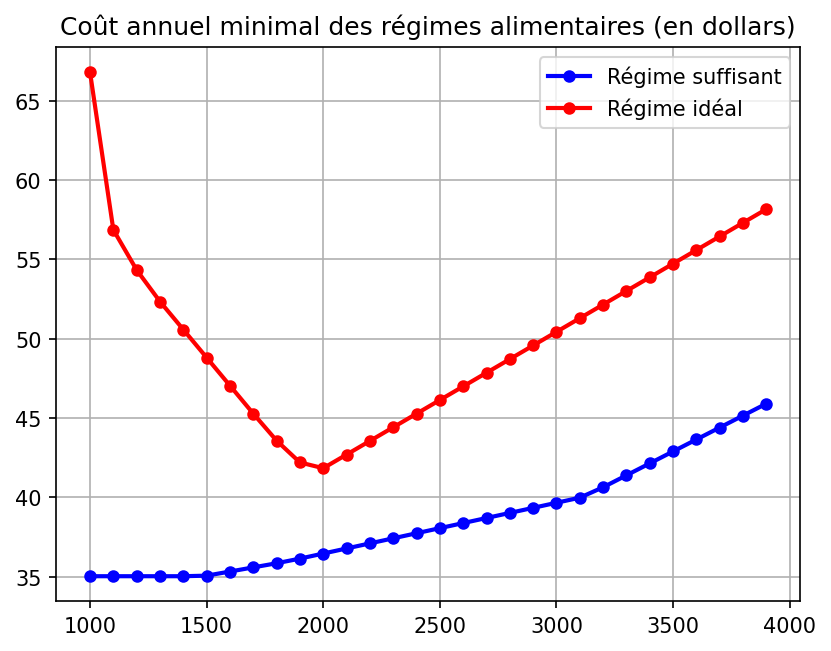

In [ ]:
# Affichage graphique 
plt.rcParams['figure.dpi'] = 150
plt.plot(range_calories,couts_regimes_suffisants, 'b.-', linewidth=2, markersize=10)
plt.plot(range_calories,couts_regimes_ideaux, 'r.-', linewidth=2, markersize=10)
plt.title('Coût annuel minimal des régimes alimentaires (en dollars)')
plt.legend(['Régime suffisant', 'Régime idéal'])
plt.grid()
plt.show()

**Question 1(d)** : résolvez à nouveau le problème pour un régime atteignant les quantités de nutriments à 5% près (c-à-d en imposant pour chaque nutriment dont la quantité idéale est v de se situer dans l’intervalle [0.95v 1.05v]). Commentez.

In [10]:
# Pour cette formulation on a besoin de prendre en compte deux contraintes, afin que
# le vecteur des contenus en nutriments (qui est égal à A x) soit compris entre sa
# borne inférieure (=0.95b) et sa borne supérieur (=1.05b)

# Il faut donc écrire A x >=  0.95b et Ax <= 1.05b, ou encore (pour n'avoir que des <=)
#                    -A x <= -0.95b et Ax <= 1.05b
# et la matrice A_ub contiendra "-A" au dessus de "A", et le vecteurb_ub contiendra -0.95b au dessus de 1.05b

# TODO : il faut donc "rassembler" les deux ensembles de contraintes dans une seule inégalité A_ub x <= b_ub
# et ainsi la matrice A_ub contiendra "-A" au dessus de "A", et le vecteurb_ub contiendra -0.95b au dessus de 1.05b
# Indice : utilisez np.concatenate pour concaténer deux matrices verticalement, et np.hstack pour joindre deux vecteurs (lignes)
res = linprog(c, A_ub=np.concatenate((-A,A)), b_ub=np.hstack((-0.95*b,1.05*b)), options={"disp": False})
print(res.message)
affiche_sol(res)

Optimization terminated successfully. (HiGHS Status 7: Optimal)
Le coût annuel (365 jours) est de 45.57 dollars.
Les 8 ingrédients réellement présents (coût > 0.01$) dans la solution sont
- Evaporated Milk (can)     : 15.71 dollars (=34.48% du total)
- Wheat Flour (Enriched)    :  9.35 dollars (=20.51% du total)
- Lard                      :  8.96 dollars (=19.66% du total)
- Cabbage                   :  3.97 dollars (= 8.72% du total)
- Liver (Beef)              :  3.96 dollars (= 8.69% du total)
- Corn Meal                 :  2.45 dollars (= 5.37% du total)
- Spinach                   :  0.60 dollars (= 1.31% du total)
- Peanut Butter             :  0.57 dollars (= 1.25% du total)
Les valeurs totales des nutriments sont
- Calories (kcal)           :   2850.0 = 95.00% de la quantité idéale (3000)
- Protein (g)               :     66.5 = 95.00% de la quantité idéale (70)
- Calcium (g)               :      0.8 = 95.00% de la quantité idéale (1)
- Iron (mg)                 :     12.6 = 1